<h1>Pandas</h1>

In [136]:
#installing pandas libraries
!pip install pandas-datareader  
# for reading files
!pip install --upgrade html5lib==1.0b8  
# for reading html

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

<h2>Imports</h2>

In [137]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook (and not in another window)
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h2>The structure of a dataframe</h2>

In [138]:
d = pd.DataFrame([[1,2,3],["4",5,6]],columns=['A','B','C']) 

<h3>Accessing columns and rows</h3>

In [139]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df


2291373725768


,row_label,A,B,C
0,r1,00,01,02
1,r2,10,11,12
2,r3,20,21,22


In [140]:
df.set_index('row_label',inplace=True) # inplace = True means that the dataframe is changed. if it was false - a new df is created
print(id(df))
df

2291373725768


,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12
r3,20,21,22


<h3>Getting column data</h3>

In [141]:
df['B']

row_label
r1    01
r2    11
r3    21
Name: B, dtype: object

In [142]:
print(type(df['B']))
print(type(df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


<h3>Getting row data</h3>

In [143]:
df.loc['r1']  # a row of a DF is like an element of a dictionary

A    00
B    01
C    02
Name: r1, dtype: object

In [144]:
type(df.loc['r1'])

pandas.core.series.Series

<h3>Getting a row by row number</h3>

In [145]:
df.iloc[0] #this is faster than by row index

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting multiple columns<h3>

In [146]:
df[['B','A']] #Note that the column identifiers are in a list

,B,A
row_label,,
r1,01,00
r2,11,10
r3,21,20


<h3>Getting a specific cell</h3>

In [147]:
df.loc['r2','B']

'11'

In [148]:
df.loc['r2']['B'] # chaining... the same result but not the same thing as in the cell above

'11'

In [149]:
id(df.loc['r2','B'])

2292309006832

<h3>Slicing</h3>

In [150]:
df.loc['r1':'r2']

,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12


In [151]:
df.loc['r1':'r2','B':'C']

,B,C
row_label,,
r1,01,02
r2,11,12


In [152]:
df.head(2)

,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12


<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<table>
    <tr><td>1</td><td>2</td></tr>
    <tr><td>3</td><td>4</td></tr>
</table>

<h4>Example: Read the tables from an html page</h4>

Unfortunately, the orginal bloomberg link doesn't work, here we use another website.

In [153]:
df_list = pd.read_html('https://www.x-rates.com/table/?from=USD&amount=1')  # looks for table tags and returns a list of tables apearing in a url
print(len(df_list))

2


<h4>The page contains two tables</h4>

In [154]:
df = df_list[0]
df

,US Dollar,1.00 USD,inv. 1.00 USD
0,Euro,0.820401,1.218917
1,British Pound,0.708069,1.412292
2,Indian Rupee,73.121671,0.013676
3,Australian Dollar,1.290057,0.775160
4,Canadian Dollar,1.210614,0.826027
5,Singapore Dollar,1.332907,0.750240
6,Swiss Franc,0.903942,1.106266
7,Malaysian Ringgit,4.139981,0.241547
8,Japanese Yen,109.116799,0.009164
9,Chinese Yuan Renminbi,6.439752,0.155285


<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [155]:
df.set_index('US Dollar',inplace=True)
df

,1.00 USD,inv. 1.00 USD
US Dollar,,
Euro,0.820401,1.218917
British Pound,0.708069,1.412292
Indian Rupee,73.121671,0.013676
Australian Dollar,1.290057,0.775160
Canadian Dollar,1.210614,0.826027
Singapore Dollar,1.332907,0.750240
Swiss Franc,0.903942,1.106266
Malaysian Ringgit,4.139981,0.241547
Japanese Yen,109.116799,0.009164


<h4>Now we can use .loc to extract specific currency rates</h4>

In [156]:
df.loc['Euro','1.00 USD']

0.820401

In [157]:
df.loc['Euro':'Swiss Franc','1.00 USD']

US Dollar
Euro                  0.820401
British Pound         0.708069
Indian Rupee         73.121671
Australian Dollar     1.290057
Canadian Dollar       1.210614
Singapore Dollar      1.332907
Swiss Franc           0.903942
Name: 1.00 USD, dtype: float64

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [158]:
eur_usd = df.loc['Euro']['1.00 USD']
eur_usd

0.820401

In [159]:
#eur_usd = df.loc['Euro']['1.00 USD'] #This is chained indexing - we are creating a copy of the dataframe
df.loc['Euro']['1.00 USD'] = 1.0 #Here we are changing a value in the dataframe
print(eur_usd) # didn't change
print(df.loc['Euro']['1.00 USD']) #changed

0.820401
1.0


In [160]:
#df.loc['Euro']
df


,1.00 USD,inv. 1.00 USD
US Dollar,,
Euro,1.000000,1.218917
British Pound,0.708069,1.412292
Indian Rupee,73.121671,0.013676
Australian Dollar,1.290057,0.775160
Canadian Dollar,1.210614,0.826027
Singapore Dollar,1.332907,0.750240
Swiss Franc,0.903942,1.106266
Malaysian Ringgit,4.139981,0.241547
Japanese Yen,109.116799,0.009164


In [161]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df

2291379677320


,row_label,A,B,C
0,r1,00,01,02
1,r2,10,11,12
2,r3,20,21,22


In [162]:
df1 = df
print(id(df1))

2291379677320


<h2>Getting historical stock prices from Yahoo financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>
Unfortunately, the Google finance datareader has stopped working because of the charge of Google's policy

In [163]:
from pandas_datareader import data
import datetime as dt
start=dt.datetime(2019, 1, 3)
end=dt.datetime.today()


print(start,end)


df = data.DataReader('IBM', 'yahoo', start, end)  # input: ticker (company's symbol), source: could be google, world bank..., 
                                                  #start date and end date



2019-01-03 00:00:00 2021-05-20 09:23:54.071740


In [164]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-03,114.879997,112.690002,114.529999,112.910004,4346700.0,99.907280
2019-01-04,117.489998,114.440002,114.910004,117.320000,4477800.0,103.809410
2019-01-07,118.830002,116.669998,117.500000,118.150002,3751200.0,104.543831
2019-01-08,120.570000,118.980003,119.660004,119.830002,4763600.0,106.030357
2019-01-09,121.400002,119.870003,120.910004,120.690002,3633700.0,106.791328
...,...,...,...,...,...,...
2021-05-13,144.899994,141.279999,141.449997,144.169998,4595800.0,144.169998
2021-05-14,145.690002,143.960007,145.110001,144.679993,2746900.0,144.679993
2021-05-17,145.800003,144.330002,144.440002,145.110001,4275100.0,145.110001


In [165]:
df.shape

(599, 6)

In [166]:
id(df)

2291375750856

In [167]:
id(df.reset_index())

2291373497800

In [168]:
df = df.reset_index()

In [169]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-03,114.879997,112.690002,114.529999,112.910004,4346700.0,99.907280
1,2019-01-04,117.489998,114.440002,114.910004,117.320000,4477800.0,103.809410
2,2019-01-07,118.830002,116.669998,117.500000,118.150002,3751200.0,104.543831
3,2019-01-08,120.570000,118.980003,119.660004,119.830002,4763600.0,106.030357
4,2019-01-09,121.400002,119.870003,120.910004,120.690002,3633700.0,106.791328
...,...,...,...,...,...,...,...
594,2021-05-13,144.899994,141.279999,141.449997,144.169998,4595800.0,144.169998
595,2021-05-14,145.690002,143.960007,145.110001,144.679993,2746900.0,144.679993
596,2021-05-17,145.800003,144.330002,144.440002,145.110001,4275100.0,145.110001
597,2021-05-18,145.300003,143.229996,144.779999,143.910004,3824100.0,143.910004


In [170]:
# myDate = dt.datetime(2020, 1, 1)
# df[df['Date']>myDate]

df[df['High']>134]


,Date,High,Low,Open,Close,Volume,Adj Close
13,2019-01-23,135.000000,130.309998,131.369995,132.889999,22063700.0,117.586357
15,2019-01-25,134.440002,132.429993,132.869995,133.970001,5707400.0,118.542007
16,2019-01-28,134.809998,132.580002,133.100006,134.270004,5357700.0,118.807472
17,2019-01-29,135.410004,133.600006,134.289993,134.330002,5037100.0,118.860527
18,2019-01-30,135.029999,133.250000,134.000000,134.380005,4500900.0,118.904778
...,...,...,...,...,...,...,...
594,2021-05-13,144.899994,141.279999,141.449997,144.169998,4595800.0,144.169998
595,2021-05-14,145.690002,143.960007,145.110001,144.679993,2746900.0,144.679993
596,2021-05-17,145.800003,144.330002,144.440002,145.110001,4275100.0,145.110001
597,2021-05-18,145.300003,143.229996,144.779999,143.910004,3824100.0,143.910004


In [171]:
df['High']>134

0      False
1      False
2      False
3      False
4      False
       ...  
594     True
595     True
596     True
597     True
598     True
Name: High, Length: 599, dtype: bool

In [172]:
np.where(df['High']>134)

(array([ 13,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,  92,  93,
         94,  95,  96,  97,  98, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 156, 157, 158, 159, 160, 161, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
        184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
        197, 198, 199, 200, 202, 203, 204, 205, 206

In [173]:
id(df.iloc[np.where(df['High']>134)])

2291379861640

In [174]:
id(df)

2291367064968

In [175]:
df.shape

(599, 7)

<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [176]:
df['Close']>df['Open']

0      False
1       True
2       True
3       True
4      False
       ...  
594     True
595    False
596     True
597    False
598     True
Length: 599, dtype: bool

In [177]:
np.where(df['Close']>df['Open'],1,0)

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [179]:
df['DOWN']= df.apply(lambda row: 1 if row['Close']<row['Open'] else 0 ,axis=1)

In [286]:
#df=df.drop('ones',axis=1)
df

,Date,High,Low,Open,Close,Volume,Adj Close,DOWN,UP,Low_prev,Low_change
0,2019-01-03,114.879997,112.690002,114.529999,112.910004,4346700.0,99.907280,1,0,NaN,NaN
1,2019-01-04,117.489998,114.440002,114.910004,117.320000,4477800.0,103.809410,0,1,112.690002,0.015529
2,2019-01-07,118.830002,116.669998,117.500000,118.150002,3751200.0,104.543831,0,1,114.440002,0.019486
3,2019-01-08,120.570000,118.980003,119.660004,119.830002,4763600.0,106.030357,0,1,116.669998,0.019799
4,2019-01-09,121.400002,119.870003,120.910004,120.690002,3633700.0,106.791328,1,0,118.980003,0.007480
...,...,...,...,...,...,...,...,...,...,...,...
594,2021-05-13,144.899994,141.279999,141.449997,144.169998,4595800.0,144.169998,0,1,141.139999,0.000992
595,2021-05-14,145.690002,143.960007,145.110001,144.679993,2746900.0,144.679993,1,0,141.279999,0.018969
596,2021-05-17,145.800003,144.330002,144.440002,145.110001,4275100.0,145.110001,0,1,143.960007,0.002570
597,2021-05-18,145.300003,143.229996,144.779999,143.910004,3824100.0,143.910004,1,0,144.330002,-0.007621


In [180]:
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

# antoher way: df['DOWN']= df.apply(lambda row: 1 if row['Close']<row['Open'] else 0 ,axis=1)

,Date,High,Low,Open,Close,Volume,Adj Close,DOWN,UP
0,2019-01-03,114.879997,112.690002,114.529999,112.910004,4346700.0,99.907280,1,0
1,2019-01-04,117.489998,114.440002,114.910004,117.320000,4477800.0,103.809410,0,1
2,2019-01-07,118.830002,116.669998,117.500000,118.150002,3751200.0,104.543831,0,1
3,2019-01-08,120.570000,118.980003,119.660004,119.830002,4763600.0,106.030357,0,1
4,2019-01-09,121.400002,119.870003,120.910004,120.690002,3633700.0,106.791328,1,0
...,...,...,...,...,...,...,...,...,...
594,2021-05-13,144.899994,141.279999,141.449997,144.169998,4595800.0,144.169998,0,1
595,2021-05-14,145.690002,143.960007,145.110001,144.679993,2746900.0,144.679993,1,0
596,2021-05-17,145.800003,144.330002,144.440002,145.110001,4275100.0,145.110001,0,1
597,2021-05-18,145.300003,143.229996,144.779999,143.910004,3824100.0,143.910004,1,0


<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [270]:
stats = df.describe()
(stats)

,High,Low,Open,Close,Volume,Adj Close,DOWN,UP,Low_prev,Low_change
count,599.000000,599.000000,599.000000,599.000000,5.990000e+02,599.000000,599.000000,599.000000,598.000000,598.000000
mean,131.879182,129.449599,130.652488,130.689099,4.925748e+06,122.498200,0.479132,0.520868,129.430418,0.000535
std,10.138469,10.623881,10.397809,10.387916,3.038789e+06,8.985726,0.499982,0.499982,10.622389,0.017867
min,97.739998,90.559998,94.599998,94.769997,1.202100e+06,88.795891,0.000000,0.000000,90.559998,-0.121155
25%,124.010002,121.605000,122.790001,122.795002,3.171300e+06,117.937820,0.000000,0.000000,121.597498,-0.006362
50%,133.820007,130.899994,132.550003,132.529999,4.159500e+06,122.681564,0.000000,1.000000,130.899994,0.001457
75%,139.539993,137.715004,138.514999,138.540001,5.587750e+06,126.725327,1.000000,1.000000,137.710007,0.008255
max,158.750000,155.419998,156.820007,156.759995,3.806350e+07,146.779999,1.000000,1.000000,155.419998,0.096069


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [273]:
df['UP'].count()

599

In [182]:
df['UP'].sum()/df['UP'].count()

0.5208681135225376

In [276]:
df['UP'].mean()

0.5208681135225376

In [277]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'DOWN',
       'UP', 'Low_prev', 'Low_change', 'ones'],
      dtype='object')

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [287]:
df['Close']

0      112.910004
1      117.320000
2      118.150002
3      119.830002
4      120.690002
          ...    
594    144.169998
595    144.679993
596    145.110001
597    143.910004
598    143.190002
Name: Close, Length: 599, dtype: float64

In [289]:
df.Close.shift(1)

0             NaN
1      112.910004
2      117.320000
3      118.150002
4      119.830002
          ...    
594    141.300003
595    144.169998
596    144.679993
597    145.110001
598    143.910004
Name: Close, Length: 599, dtype: float64

In [288]:
df['Close'].pct_change() #One timeperiod percent change

0           NaN
1      0.039058
2      0.007075
3      0.014219
4      0.007177
         ...   
594    0.020311
595    0.003537
596    0.002972
597   -0.008270
598   -0.005003
Name: Close, Length: 599, dtype: float64

In [186]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
594    0.018365
595    0.018801
596    0.014755
597   -0.002288
598    0.009233
Name: Close, Length: 599, dtype: float64

In [187]:
# Another way to calculate changes is using shift of a column:
df['Low_prev'] = df.Low.shift(1)
df['Low_change'] = (df.Low - df.Low_prev)/df.Low_prev


In [307]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,DOWN,UP,Low_prev,Low_change
0,2019-01-03,114.879997,112.690002,114.529999,112.910004,4346700.0,99.907280,1,0,NaN,NaN
1,2019-01-04,117.489998,114.440002,114.910004,117.320000,4477800.0,103.809410,0,1,112.690002,0.015529
2,2019-01-07,118.830002,116.669998,117.500000,118.150002,3751200.0,104.543831,0,1,114.440002,0.019486
3,2019-01-08,120.570000,118.980003,119.660004,119.830002,4763600.0,106.030357,0,1,116.669998,0.019799
4,2019-01-09,121.400002,119.870003,120.910004,120.690002,3633700.0,106.791328,1,0,118.980003,0.007480


<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [293]:
n=13
df['Close'].pct_change(n).mean()

0.006519954719054385

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [309]:
df['Close'].pct_change(n)[3:10]

3    0.014219
4    0.007177
5    0.009114
6   -0.002710
7   -0.008809
8    0.011131
9   -0.000904
Name: Close, dtype: float64

In [305]:
df.Close.rolling(21)

Rolling [window=21,center=False,axis=0]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [306]:
n=1
df['Close'].rolling(21).mean()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
594    142.041429
595    142.617619
596    143.166191
597    143.680001
598    143.919524
Name: Close, Length: 599, dtype: float64

<h4>Calculate several moving averages and graph them</h4>

In [302]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_30= df['Close'].pct_change(n).rolling(window=30).mean()
ma_60= df['Close'].pct_change(n).rolling(window=60).mean()

In [194]:
df['Close'].pct_change(n)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
594    0.018365
595    0.018801
596    0.014755
597   -0.002288
598    0.009233
Name: Close, Length: 599, dtype: float64

In [195]:
type(ma_30)

pandas.core.series.Series

In [303]:
ma_30

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
594    0.002749
595    0.002874
596    0.002298
597    0.002441
598    0.002098
Name: Close, Length: 599, dtype: float64

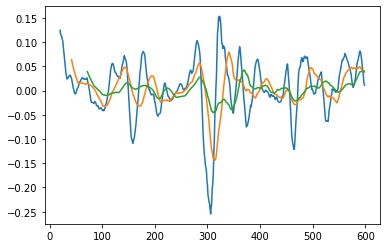

In [200]:
ma_8.plot()
ma_30.plot()
ma_60.plot()

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF  fund. FSLR, RGSE, SPWR are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [201]:
# Please Note that the historical data of SCTY is not completed so we remove this stock from the list. 
# Change SCTY to SPWR
import datetime
import pandas_datareader as data
start = datetime.datetime(2018,7,1)
end = datetime.datetime(2019,6,1)
solar_df = data.DataReader(['FSLR', 'TAN','SPWR'],'yahoo', start=start,end=end)['Close']

#digitalProd_df = data.DataReader(['AAPL', 'SMSN.L','NOK'],'yahoo', start=start,end=end)['Close']

In [202]:
#digitalProd_df
solar_df['FSLR_change'] = solar_df['FSLR'].pct_change()


In [203]:
solar_df

Symbols,FSLR,TAN,SPWR,FSLR_change
Date,,,,
2018-07-02,53.049999,23.260000,5.271775,NaN
2018-07-03,52.360001,23.080000,5.042567,-0.013007
2018-07-05,53.299999,23.260000,5.166994,0.017953
2018-07-06,54.529999,23.540001,5.153897,0.023077
2018-07-09,54.830002,23.930000,5.212836,0.005502
...,...,...,...,...
2019-05-24,57.310001,25.500000,5.094957,-0.000349
2019-05-28,58.349998,25.790001,5.140799,0.018147
2019-05-29,57.860001,25.620001,5.055665,-0.008398


<h4>Let's calculate returns (the 1 day percent change)</h4>

In [220]:
# rets = digitalProd_df.pct_change()

rets = solar_df.pct_change()
rets

Symbols,FSLR,TAN,SPWR,FSLR_change
Date,,,,
2018-07-02,NaN,NaN,NaN,NaN
2018-07-03,-0.013007,-0.007739,-0.043478,NaN
2018-07-05,0.017953,0.007799,0.024675,-2.380272
2018-07-06,0.023077,0.012038,-0.002535,0.285435
2018-07-09,0.005502,0.016568,0.011436,-0.761597
...,...,...,...,...
2019-05-24,-0.000349,0.016746,0.006468,-0.988090
2019-05-28,0.018147,0.011373,0.008998,-53.016812
2019-05-29,-0.008398,-0.006592,-0.016560,-1.462756


<h4>Let's visualize the relationship between each stock and the ETF</h4>

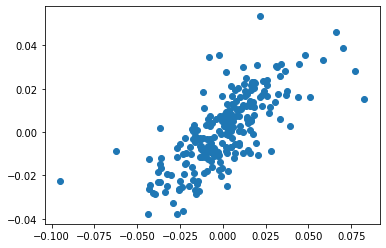

In [206]:
import matplotlib.pyplot as plt
#plt.scatter(rets['AAPL'],rets['SMSN.L'])

plt.scatter(rets.FSLR,rets.TAN)

In [ ]:
#plt.scatter(rets.RGSE,rets.TAN)

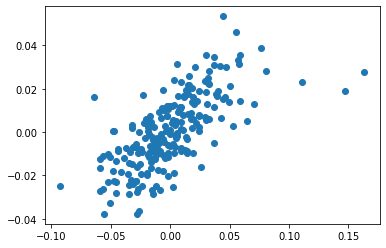

In [207]:
plt.scatter(rets.SPWR,rets.TAN)

<h4>The correlation matrix</h4>

In [208]:
solar_corr = rets.corr()
print(solar_corr)

Symbols          FSLR       TAN      SPWR  FSLR_change
Symbols                                               
FSLR         1.000000  0.733408  0.640075    -0.052543
TAN          0.733408  1.000000  0.690854    -0.057779
SPWR         0.640075  0.690854  1.000000    -0.026057
FSLR_change -0.052543 -0.057779 -0.026057     1.000000


<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

In [221]:
rets.mean()
rets.std()

Symbols
FSLR            0.023064
TAN             0.016852
SPWR            0.033452
FSLR_change    12.623191
dtype: float64

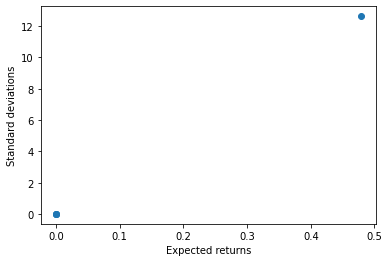

In [226]:
# plt.scatter(rets[['FSLR','TAN','SPWR']].mean(), rets[['FSLR','TAN','SPWR']].std())
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
plt.show()

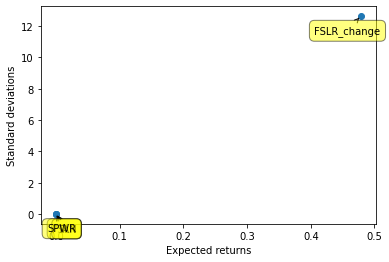

In [253]:
#plt.scatter(rets[['FSLR','TAN','SPWR']].mean(), rets[['FSLR','TAN','SPWR']].std())
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(  # adding annotation to the diagram
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5), # alpha - the intensity of the color
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )
#plt.xlim(0.0,0.0015)

plt.show()


In [229]:
list(zip(rets.columns, rets.mean(), rets.std()))

[('FSLR', 0.0006569761725659778, 0.023064446564513646),
 ('TAN', 0.0005716152286967802, 0.016851964121580597),
 ('SPWR', 0.0002139386655404213, 0.033451894136634866),
 ('FSLR_change', 0.478074766369697, 12.62319144682584)]

<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [254]:
import numpy as np
import statsmodels.api as sm

In [255]:

X=solar_df[['FSLR','SPWR']]
X = sm.add_constant(X)
y=solar_df['TAN']
model = sm.OLS(y,X,missing='drop') # https://en.wikipedia.org/wiki/Ordinary_least_squares 
                                    # drop - removes rows with missing values
result = model.fit() # finds the model parameters
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    TAN   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     604.2
Date:                Thu, 20 May 2021   Prob (F-statistic):           1.25e-91
Time:                        11:32:51   Log-Likelihood:                -295.24
No. Observations:                 230   AIC:                             596.5
Df Residuals:                     227   BIC:                             606.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7266      0.547      8.635      0.0

In [256]:
X

,const,FSLR,SPWR
Date,,,
2018-07-02,1.0,53.049999,5.271775
2018-07-03,1.0,52.360001,5.042567
2018-07-05,1.0,53.299999,5.166994
2018-07-06,1.0,54.529999,5.153897
2018-07-09,1.0,54.830002,5.212836
...,...,...,...
2019-05-24,1.0,57.310001,5.094957
2019-05-28,1.0,58.349998,5.140799
2019-05-29,1.0,57.860001,5.055665


In [257]:
y

Date
2018-07-02    23.260000
2018-07-03    23.080000
2018-07-05    23.260000
2018-07-06    23.540001
2018-07-09    23.930000
                ...    
2019-05-24    25.500000
2019-05-28    25.790001
2019-05-29    25.620001
2019-05-30    25.969999
2019-05-31    25.670000
Name: TAN, Length: 230, dtype: float64

<h4>Finally plot the fitted line with the actual y values

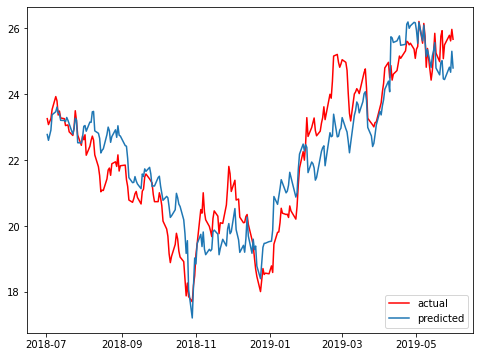

In [258]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y, color='r', label='actual')
ax.plot(result.fittedvalues, label='predicted')
ax.legend(loc="lower right") #"upper right"


In [259]:
result

In [260]:
result.fittedvalues

Date
2018-07-02    22.778619
2018-07-03    22.602372
2018-07-05    22.910934
2018-07-06    23.378805
2018-07-09    23.470276
                ...    
2019-05-24    24.446965
2019-05-28    24.821818
2019-05-29    24.668362
2019-05-30    25.305120
2019-05-31    24.798191
Length: 230, dtype: float64